In [12]:
import pandas as pd

# Data Loading
df = pd.read_csv('Downloads/student/student-mat.csv', sep=';')

# Display the first few rows
print("First five rows:")
print(df.head())

# Data Exploration
print("\nMissing values per column:")
print(df.isnull().sum())  # Check for missing values

print("\nColumn data types:")
print(df.dtypes)          # Display column data types

print("\nDataset shape (rows, columns):")
print(df.shape)           # Size of dataset

# Data Cleaning
# (a) Handle missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        else:
            df = df[df[col].notnull()]

# (b) Remove duplicate entries
df = df.drop_duplicates()

print("\nShape after cleaning (rows, columns):")
print(df.shape)


First five rows:

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Column data types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    ob

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Downloads/student/student-mat.csv', sep=';')

# Clean column names and convert necessary columns to numeric
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
df['g3'] = pd.to_numeric(df['g3'], errors='coerce')
df['studytime'] = pd.to_numeric(df['studytime'], errors='coerce')
df['sex'] = df['sex'].str.strip().str.upper()

# 1. Calculate average score in math (G3)
avg_g3 = df['g3'].mean()

# 2. Count of students scoring above 15 in the final grade (G3)
count_above_15 = (df['g3'] > 15).sum()

# 3. Correlation between study time and final grade (G3)
correlation = df['studytime'].corr(df['g3'])

# 4. Average final grade (G3) by gender and which gender has higher average
gender_avg = df.groupby('sex')['g3'].mean()
higher_gender = gender_avg.idxmax()
higher_gender_mean = gender_avg.max()

# Print results
print("Average G3 score:", avg_g3)
print("Number of students scoring above 15 in final grade:", count_above_15)
print("Correlation between study time and final grade:", correlation)
print("Average final grade by gender:")
print(gender_avg)
print(f"Gender with higher average final grade: {higher_gender} ({higher_gender_mean})")


Average G3 score: 10.415189873417722
Number of students scoring above 15 in final grade: 40
Correlation between study time and final grade: 0.09781968965319626
Average final grade by gender:
sex
F     9.966346
M    10.914439
Name: g3, dtype: float64
Gender with higher average final grade: M (10.914438502673796)


Matplotlib is building the font cache; this may take a moment.


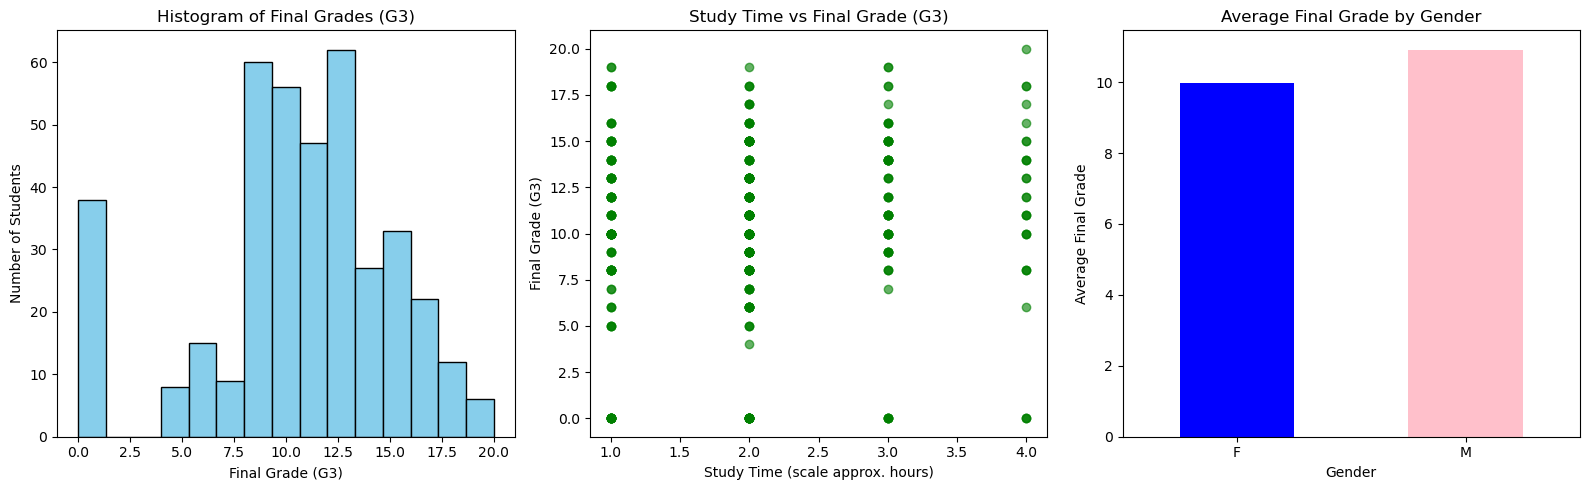

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Downloads/student/student-mat.csv', sep=';')

# Clean columns for numeric conversion
for col in ['G1', 'G2', 'G3', 'studytime']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('"', ''), errors='coerce')

df['sex'] = df['sex'].str.strip().str.upper()

plt.figure(figsize=(16, 5))

# 1. Histogram of final grades (G3)
plt.subplot(1, 3, 1)
plt.hist(df['G3'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')

# 2. Scatter plot between study time and final grade (G3)
plt.subplot(1, 3, 2)
plt.scatter(df['studytime'], df['G3'], alpha=0.6, color='green')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (scale approx. hours)')
plt.ylabel('Final Grade (G3)')

# 3. Bar chart comparing average final grade by gender
plt.subplot(1, 3, 3)
avg_scores = df.groupby('sex')['G3'].mean()
avg_scores.plot(kind='bar', color=['blue', 'pink'], rot=0)
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade')

plt.tight_layout()
plt.show()
